# DengAI : Predicting Disease Spread

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-trophical parts of the world. As it is carried by mosquitoes, the transmission of dynamics of dengue are related to climate variables such as temperature and precipitation. 

In this analysis, the environmental data collected by various U.S. Federal Government agencies are used to to predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru.

The following environmental measurements taken on a year-week of year timescale from the two cities are included as the features of the dataset.

NOAA's GHCN daily climate data weather station measurements

PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

There are twenty features in the dataset.

## Dataset

In [293]:
import pandas as pd
import numpy as np

dengue_features_train=pd.read_csv('dengue_features_train.csv')
dengue_features_test=pd.read_csv('dengue_features_test.csv')
dengue_labels_train=pd.read_csv('dengue_labels_train.csv')
submission_format=pd.read_csv('submission_format.csv')

In [294]:
features=['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [295]:
dengue_features_train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [296]:
dengue_labels_train.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


The  datasets contains information about both cities San Juan, Puerto Rico (sj) and Iquitos, Peru(iq).
As the features may affect differently to the spread of dengue in the two cities , it is necessary to split the training dataframe in to two and train different models for each city.


In [297]:
sj_train_features=dengue_features_train[dengue_features_train['city']=='sj']
sj_train_labels=dengue_labels_train[dengue_labels_train['city']=='sj']

In [298]:
iq_train_features=dengue_features_train[dengue_features_train['city']=='iq']
iq_train_labels=dengue_labels_train[dengue_labels_train['city']=='iq']

If the datasets contain 'NaN' values, they sould be replaced with the most recent value up to that point.

In [301]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

In [302]:
iq=pd.merge(iq_train_features,iq_train_labels,
            how='outer',left_on=['city','year','weekofyear'],
            right_on=['city','year','weekofyear'])
iq=iq.drop(columns=['city','week_start_date'])
iq=iq.set_index(['year','weekofyear'])
iq_x=iq.loc[:,features]
iq_y=iq.loc[:,'total_cases']

In [303]:
sj=pd.merge(sj_train_features,sj_train_labels,
            how='outer',left_on=['city','year','weekofyear'],
            right_on=['city','year','weekofyear'])
sj=sj.drop(columns=['city','week_start_date'])
sj=sj.set_index(['year','weekofyear'])
sj_x=sj.loc[:,features]
sj_y=sj.loc[:,'total_cases']

## Explortory Data Analysis

In [304]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

Text(0, 0.5, 'Number of dengue cases')

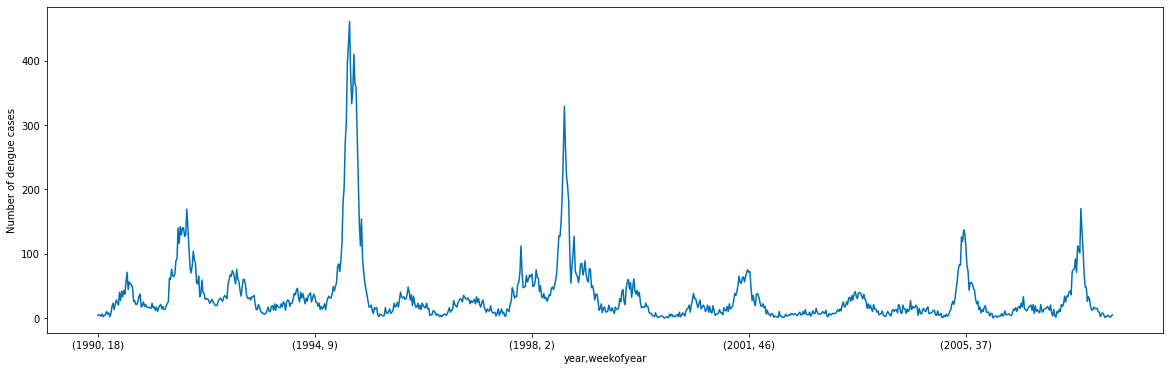

In [305]:
plt.figure(figsize=(20,6))
sj_y.plot()
ax = plt.gca()
ax.set_ylabel('Number of dengue cases')

This plot shows the number of dengue cases reported each week in San Juan, Puerto Rico (sj) from 1990 to 2008.

Text(0, 0.5, 'Number of dengue cases')

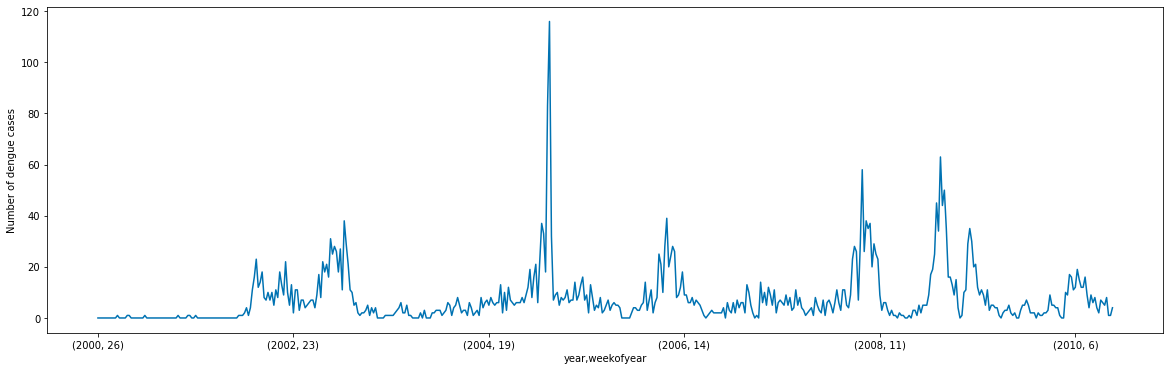

In [306]:
plt.figure(figsize=(20,6))
iq_y.plot()
ax = plt.gca()
ax.set_ylabel('Number of dengue cases')

This plot shows the number of dengue cases reported each week in Iquitos, Peru(iq) from 2000 to 2010.

Text(0.5, 1, 'San Juan Variable Correlations')

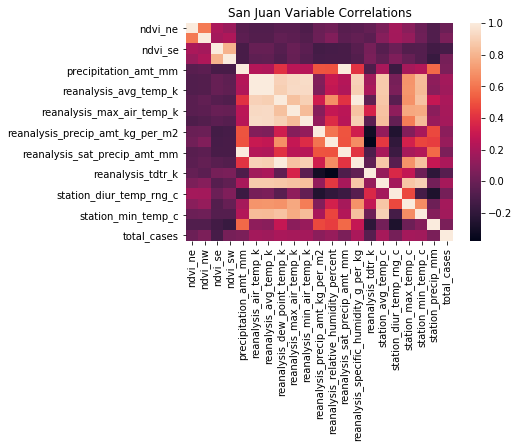

In [307]:
import seaborn as sns

sj_corr_heat = sns.heatmap(sj.corr())
plt.title('San Juan Variable Correlations')

This is the correlation matrix heatmap for the San Juan(sj) dataset. Some strong correlations can be seen between temperature variables. But total dengue cases have no strong correlation with any feature variable.

Text(0.5, 1, 'Iquitos Variable Correlations')

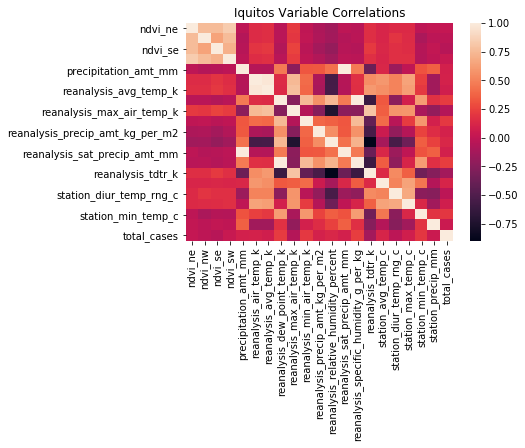

In [308]:
iq_corr_heat = sns.heatmap(iq.corr())
plt.title('Iquitos Variable Correlations')

The correlation matrix heatmap for the Iquitos(iq) dataset is similar to the previous heatmap for San Juan(sj) dataset. There are no strong correlation between the feature variables and the number of dengue cases.

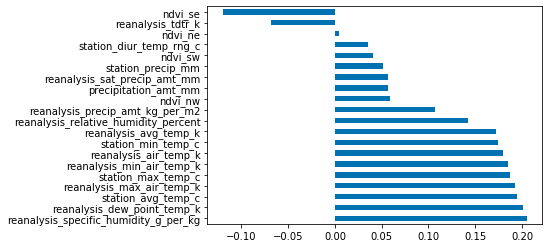

In [309]:
(sj.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

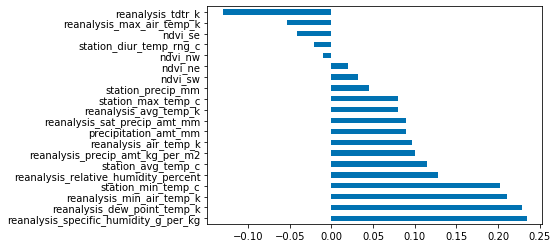

In [310]:
(iq.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

According to the above visualizations, 'reanalysis_specific_humidity_g_per_kg' and 'reanalysis_dew_point_temp_k' are the most correlated variables with 'total_cases' for both datasets. 

Following are the feature varibles which have some correlation with dengue spread and can be used to fit a model.

## Selecting a Model

The dependent varible of this model (number of dengue cases) is a discrete varible.
So that, Negative Binomial Regression can be used to formulate a model.


### Negative Binomial Regression

Although the poisson regression modelling is widely used in count data analysis,it does have a limitation, i.e. the mean and variance of the dependent variable are equal. One approach that addresses this issue is Negative Binomial Regression. When the variance is higher than the mean, Negative Binomial Regression can be used.

In [311]:
sj_y.mean(),sj_y.var()

(34.18055555555556, 2640.045439691045)

In [312]:
iq_y.mean(),iq_y.var()

(7.565384615384615, 115.89552393656412)

For both datasets , variance of the dependent variable is higher than the mean.Therefore, Negative Binomial Regression can be used to train a model.

In [313]:
from sklearn.model_selection import train_test_split

In [314]:
sj_x_subtrain,sj_x_subtest,sj_y_subtrain,sj_y_subtest=train_test_split(sj_x,sj_y,random_state=0)
iq_x_subtrain,iq_x_subtest,iq_y_subtrain,iq_y_subtest=train_test_split(iq_x,iq_y,random_state=0)
sj_train_data=pd.merge(sj_x_subtrain,sj_y_subtrain,how='outer',left_index=True,right_index=True)
iq_train_data=pd.merge(iq_x_subtrain,iq_y_subtrain,how='outer',left_index=True,right_index=True)

In [315]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [316]:
model_formula1 = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"

In [317]:
model_formula2 = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k" 
                   

In [318]:
model_formula3 = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_max_air_temp_k + " \
                    "station_avg_temp_c"

In [319]:
model_formula4 = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c"

#### Hyper parameter optimization on Negtive binomial regression

Alpha in negative binomial regression is the estimate of the dispersion parameter. If the dispersion parameter equals to zero, the model reduces to the simpler poisson model. If alpha is significantly greater than zero, then the data are overdispersed and are better estimated using a negative binomial model.
In this analysis, different models with different alpha values are considered to obtain the best model with least mean absolute error.

In [320]:
alpha_range =np.array([0.00000001,0.0000001,0.000001,0.0001])
alpha_range

array([1.e-08, 1.e-07, 1.e-06, 1.e-04])

In [321]:
def model_selection(model_form,train_data,x_train,x_test,y_test):
    best_alpha = []
    best_score = 1000

    for alpha in alpha_range:
        model = smf.glm(formula=model_form,data=train_data
                ,family=sm.families.NegativeBinomial(alpha=0.0001))
        results=model.fit()
        predictions = results.predict(x_test).astype(int)
        score = eval_measures.meanabs(predictions,y_test )
        if score < best_score:
            best_alpha=alpha
            best_score=score
            
    
    return (best_alpha,best_score)

#### Model selection for San Juan dataset (NBR)

In [322]:
model_selection(model_formula1,sj_train_data,sj_x_subtrain,sj_x_subtest,sj_y_subtest)

(1e-08, 27.205128205128204)

In [323]:
model_selection(model_formula2,sj_train_data,sj_x_subtrain,sj_x_subtest,sj_y_subtest)

(1e-08, 27.23931623931624)

In [324]:
model_selection(model_formula3,sj_train_data,sj_x_subtrain,sj_x_subtest,sj_y_subtest)

(1e-08, 27.358974358974358)

The least mean absolute error on San Juan test data is obtained by model formula 1 when alpha equals to 0.00000001 

#### Model selection for Iquitos dataset (NBR)

In [325]:
model_selection(model_formula1,iq_train_data,iq_x_subtrain,iq_x_subtest,iq_y_subtest)

(1e-08, 6.569230769230769)

In [326]:
model_selection(model_formula2,iq_train_data,iq_x_subtrain,iq_x_subtest,iq_y_subtest)

(1e-08, 6.607692307692307)

In [327]:
model_selection(model_formula4,iq_train_data,iq_x_subtrain,iq_x_subtest,iq_y_subtest)

(1e-08, 6.576923076923077)

The least mean absolute error on Iquitos test data is obtained by model formula 1 when alpha equals to 0.00000001

For both datasets , model formula 1 gives the least mean absolute error in Negative Binomial Regression.

### KNN Regression

KNN regression is a non_parametric method that, approximates the association between independent variables and the outcome by averaging the observationsnin the same neighborhood. The size of the neighborhood can be chosen using cross_validation to select the size that minimizes the mean_squared error.

#### Hyper parameter optimization on KNN regression

K is the number of nearest neighbours considered when fitting a model.
When K increases to inf, the model is simplest. All test data points will belong to the majority class. This is underfittig. When K decreases and equals to one, the model is overfitting. The most suitable K value should be found which performs well with test data.

In [328]:
K_range=np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [329]:
sj_modelform1_xtrain=sj_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','station_min_temp_c', 'station_avg_temp_c']]
sj_modelform1_xtest=sj_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','station_min_temp_c', 'station_avg_temp_c']]

sj_modelform2_xtrain=sj_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k']]
sj_modelform2_xtest=sj_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k']]

sj_modelform3_xtrain=sj_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','station_avg_temp_c']]
sj_modelform3_xtest=sj_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','station_avg_temp_c']]

sj_modelform4_xtrain=sj_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']]
sj_modelform4_xtest=sj_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']]

In [330]:
iq_modelform1_xtrain=iq_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','station_min_temp_c', 'station_avg_temp_c']]
iq_modelform1_xtest=iq_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','station_min_temp_c', 'station_avg_temp_c']]

iq_modelform2_xtrain=iq_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k']]
iq_modelform2_xtest=iq_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k']]

iq_modelform3_xtrain=iq_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','station_avg_temp_c']]
iq_modelform3_xtest=iq_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','station_avg_temp_c']]

iq_modelform4_xtrain=iq_x_subtrain.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']]
iq_modelform4_xtest=iq_x_subtest.loc[:,['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']]


In [331]:
from sklearn.neighbors import KNeighborsRegressor

def KNN_Reg(x_train,y_train,x_test,y_test):
    best_score = 1000
    for K in K_range:
        knnreg = KNeighborsRegressor(n_neighbors = K).fit(x_train, y_train)
        predictions=knnreg.predict(x_test).astype(int)
        score = eval_measures.meanabs(predictions,y_test )
        if score < best_score:
            best_K=K
            best_score=score
            
    
    return (best_K,best_score)


#### Model selection for San Juan dataset (KNN)

In [332]:
KNN_Reg(sj_modelform1_xtrain,sj_y_subtrain,sj_modelform1_xtest,sj_y_subtest)

(12, 27.944444444444443)

In [333]:
KNN_Reg(sj_modelform2_xtrain,sj_y_subtrain,sj_modelform2_xtest,sj_y_subtest)

(19, 28.34188034188034)

In [334]:
KNN_Reg(sj_modelform3_xtrain,sj_y_subtrain,sj_modelform3_xtest,sj_y_subtest)

(17, 26.89316239316239)

In [335]:
KNN_Reg(sj_modelform4_xtrain,sj_y_subtrain,sj_modelform4_xtest,sj_y_subtest)

(24, 27.799145299145298)

The least mean absolute error on San Juan test data is obtained by model formula 3 when K equals to 17.

#### Model selection for Iquitos dataset (KNN)

In [336]:
KNN_Reg(iq_modelform1_xtrain,iq_y_subtrain,iq_modelform1_xtest,iq_y_subtest)

(20, 6.461538461538462)

In [337]:
KNN_Reg(iq_modelform2_xtrain,iq_y_subtrain,iq_modelform2_xtest,iq_y_subtest)

(25, 6.392307692307693)

In [338]:
KNN_Reg(iq_modelform3_xtrain,iq_y_subtrain,iq_modelform3_xtest,iq_y_subtest)

(6, 6.2384615384615385)

In [339]:
KNN_Reg(iq_modelform4_xtrain,iq_y_subtrain,iq_modelform4_xtest,iq_y_subtest)

(25, 6.246153846153846)

The least mean absolute error on Iquitos test data is obtained by model formula 3 when K equals to 6.

#### According to the mean absolute errors of the fitted models on both NBR and KNN , the least mean absolute error is obtained by model formula 3 on KNN regression.

The feature variables of the best model are

In [340]:
best_model=['reanalysis_specific_humidity_g_per_kg',
'reanalysis_dew_point_temp_k',
'reanalysis_max_air_temp_k',
'station_avg_temp_c']


### Best model for San Juan Dataset

Best model for San Juan dataset is KNN regression model when K equals to 17.

Text(0.5, 1.0, 'Actual Vs Predicted (San Juan)')

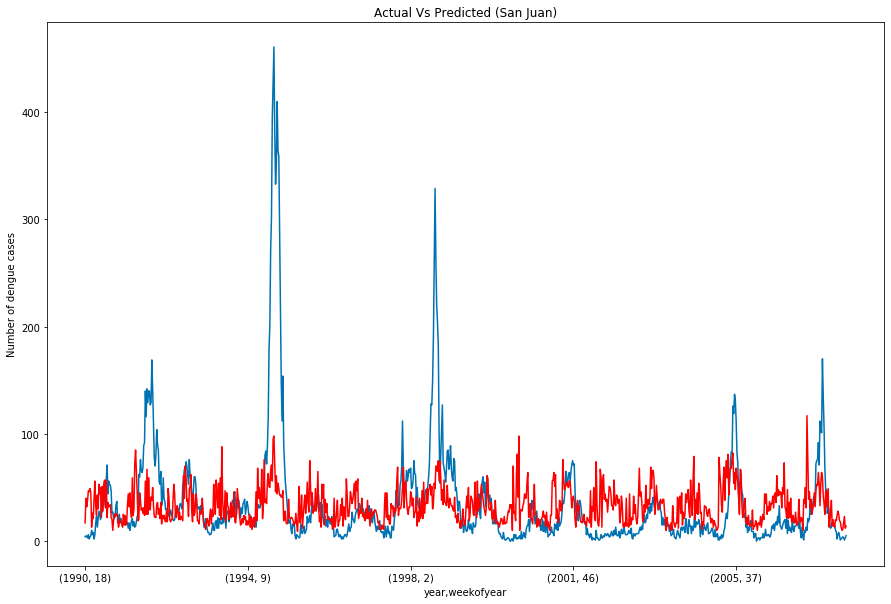

In [341]:
knnregSJ = KNeighborsRegressor(n_neighbors = 17).fit(sj_x.loc[:,best_model],sj_y)
p_train=knnregSJ.predict(sj_x.loc[:,best_model]).astype(int)

sj_x['predict']=p_train
plt.figure(figsize=(15,10))
sj_y.plot()

ax = plt.gca()
sj_x['predict'].plot(c='r')
ax.set_ylabel('Number of dengue cases')
ax.set_title('Actual Vs Predicted (San Juan)')

### Best model for Iquitos Dataset

Best model for San Juan dataset is KNN regression model when K equals to 6.

Text(0.5, 1.0, 'Actual Vs Predicted (Iquitos)')

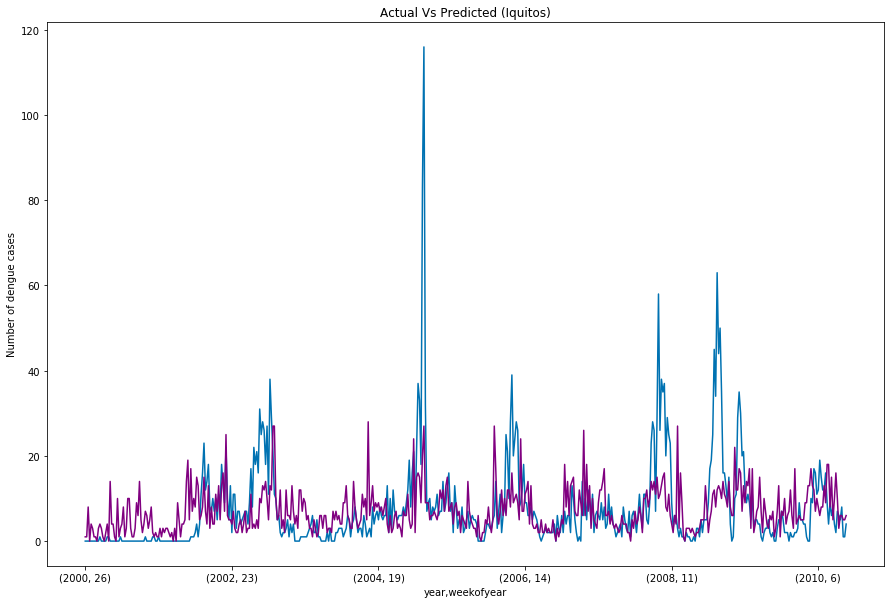

In [342]:
knnregIQ = KNeighborsRegressor(n_neighbors = 6).fit(iq_x.loc[:,best_model],iq_y)
p_train1=knnregIQ.predict(iq_x.loc[:,best_model]).astype(int)

iq_x['predict']=p_train1
plt.figure(figsize=(15,10))
iq_y.plot()

ax = plt.gca()
iq_x['predict'].plot(c='purple')
ax.set_ylabel('Number of dengue cases')
ax.set_title('Actual Vs Predicted (Iquitos)')

## Model Interpretation

When comparing the above two plots , it is noted that some significant spikes in the real data cannot be described by the KNN regression model. This is evidence to that there are other features which significantly affect dengu spread other than environmental features. For example the factors like population density, quality of life , health facilities may have a significant effect on Dengu spread. To formulate a better model , it is necessary to consider those factors as well.

## Predicting the test set

In [343]:
sj_x_test=dengue_features_test[dengue_features_test['city']=='sj']
iq_x_test=dengue_features_test[dengue_features_test['city']=='iq']

sj_x_test=sj_x_test.loc[:,best_model]
iq_x_test=iq_x_test.loc[:,best_model]

sj_x_test.fillna(method='ffill', inplace=True)
iq_x_test.fillna(method='ffill', inplace=True)

### Predicting San Juan test set

In [344]:
sj_predict=knnregSJ.predict(sj_x_test).astype(int)

### Predicting Iquitos test set

In [345]:
iq_predict=knnregIQ.predict(iq_x_test).astype(int)

In [292]:
sj1=submission_format[submission_format['city']=='sj']
sj1['total_cases']=sj_predict

iq1=submission_format[submission_format['city']=='iq']
iq1['total_cases']=iq_predict


In [283]:
sj1.to_csv('sj.csv')
iq1.to_csv('iq.csv')

#### Mean Absolute Error on Test Data = 27.8293